In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("weatherHistory.csv")
# print(df.head())
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print(df.columns.tolist())
df.dtypes

df.head()

Number of rows: 96453
Number of columns: 12
['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset
# Subset instances of the majority class ("rain")
rain_subset = df[df['Precip Type'] == 'rain'].sample(n=10000, random_state=42)

# Keep instances of the minority class ("snow")
snow_instances = df[df['Precip Type'] == 'snow']

# Concatenate the subset of rain instances and all snow instances
balanced_df = pd.concat([rain_subset, snow_instances])

# Shuffle the DataFrame to ensure instances are randomly ordered
balanced_df = balanced_df.sample(frac=1, random_state=42)

# Check the class distribution in the balanced dataset
print(balanced_df['Precip Type'].value_counts())


df=balanced_df

Precip Type
snow    10712
rain    10000
Name: count, dtype: int64


In [3]:
print(df['Precip Type'].value_counts())

Precip Type
snow    10712
rain    10000
Name: count, dtype: int64


In [4]:
#let's see no of rows having nan as precip type
nan_rows = df[df['Precip Type'].isna()]
print("Number of rows with NaN in 'Precip Type':", len(nan_rows))

Number of rows with NaN in 'Precip Type': 0


In [5]:
#I will drop these values as they don't have much impact on the dataset (517 out of 96453 records)
df = df.dropna(subset=['Precip Type'])
print("Number of rows after dropping NaN values:", df.shape[0])
print("Number of columns after dropping NaN values:", df.shape[1])
unique_precip = df['Precip Type'].unique()
print(unique_precip)

Number of rows after dropping NaN values: 20712
Number of columns after dropping NaN values: 12
['snow' 'rain']


In [6]:
df.dtypes
#need to use label encoding 
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Summary', 'Precip Type', 'Daily Summary']

label_encoder = LabelEncoder()

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Print the updated DataFrame
print(df)

                      Formatted Date  Summary  Precip Type  Temperature (C)  \
81122  2015-02-01 05:00:00.000 +0100       16            1        -2.272222   
81194  2015-02-12 05:00:00.000 +0100       17            1        -2.088889   
72078  2014-12-27 06:00:00.000 +0100        5            1        -2.877778   
19927  2008-02-16 07:00:00.000 +0100       15            1        -5.144444   
49103  2011-03-15 23:00:00.000 +0100       15            0        11.622222   
...                              ...      ...          ...              ...   
7872   2006-10-31 00:00:00.000 +0100        5            1        -1.755556   
15846  2007-11-28 07:00:00.000 +0100        5            1        -2.166667   
55239  2012-02-25 15:00:00.000 +0100       17            0        10.000000   
68474  2013-11-29 03:00:00.000 +0100       16            0         1.227778   
47001  2011-01-02 09:00:00.000 +0100       10            1        -3.861111   

       Apparent Temperature (C)  Humidity  Wind Spe

In [7]:
#exclude non-numeric values
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z', utc=True)

# Now, you can use the .dt accessor to extract year, month, and day
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day

df.drop('Formatted Date', axis=1, inplace=True)
target_correlation = df.corr()['Precip Type'].sort_values(ascending=False)
print("Correlation with 'Precip Type':")
print(target_correlation)

Correlation with 'Precip Type':
Precip Type                 1.000000
Humidity                    0.413900
Day                         0.014252
Pressure (millibars)        0.012820
Wind Bearing (degrees)     -0.062455
Year                       -0.074804
Wind Speed (km/h)          -0.102720
Month                      -0.188602
Summary                    -0.191418
Daily Summary              -0.388354
Visibility (km)            -0.440315
Apparent Temperature (C)   -0.809624
Temperature (C)            -0.811071
Loud Cover                       NaN
Name: Precip Type, dtype: float64


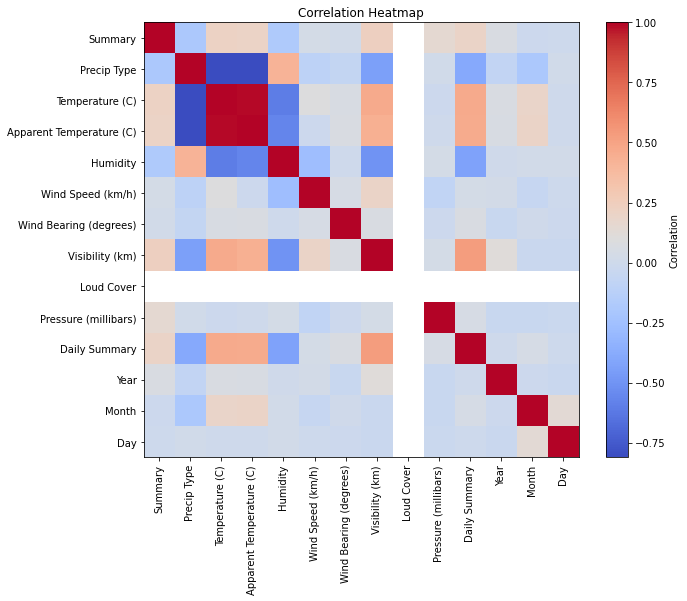

In [8]:
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title("Correlation Heatmap")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

In [12]:
#Naive Bayes model
'''
Based on the correlation matrix
"Temperature (C)" and "Apparent Temperature (C)" have very negative correlation wrt preciptype
"Humidity" shows moderate positive correlation
Let's consider these 3 parameters for our analysis

'''
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score,f1_score,recall_score

X = df[['Apparent Temperature (C)', 'Temperature (C)', 'Humidity']]
y = df['Precip Type']

#testing,train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)


# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1score)


Accuracy: 0.9401399951725803
Precision: 0.9037037037037037
Recall: 0.9871489766777725
F1-score: 0.9435850773430391


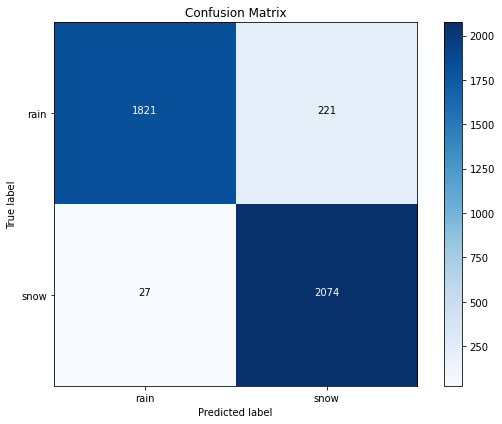

In [13]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['rain', 'snow']))
plt.xticks(tick_marks, ['rain', 'snow'])
plt.yticks(tick_marks, ['rain', 'snow'])

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [14]:
#let's do a KNN model now
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=1)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# print("Classification Report:")
# print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1score)

Accuracy: 0.9961380642046826
Precision: 0.9924421350968351
Recall: 1.0
F1-score: 0.9962067330488383


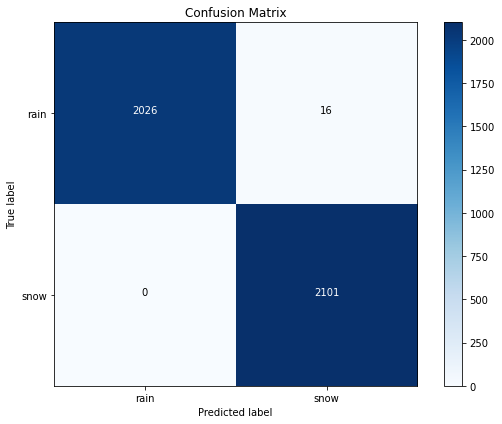

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['rain', 'snow']))
plt.xticks(tick_marks, ['rain', 'snow'])
plt.yticks(tick_marks, ['rain', 'snow'])

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [16]:
#Let us use an SVM model now
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# print("Classification Report:")
# print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1score)

Accuracy: 0.9925174993965725
Precision: 0.9854596622889306
Recall: 1.0
F1-score: 0.9926765887077723


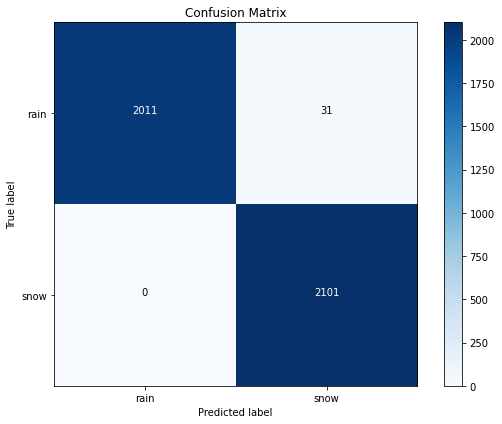

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['rain', 'snow']))
plt.xticks(tick_marks, ['rain', 'snow'])
plt.yticks(tick_marks, ['rain', 'snow'])

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [18]:
#let's use Decision Trees now
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1score)

Accuracy: 0.999275887038378
Precision: 0.998574144486692
Recall: 1.0
F1-score: 0.9992865636147443


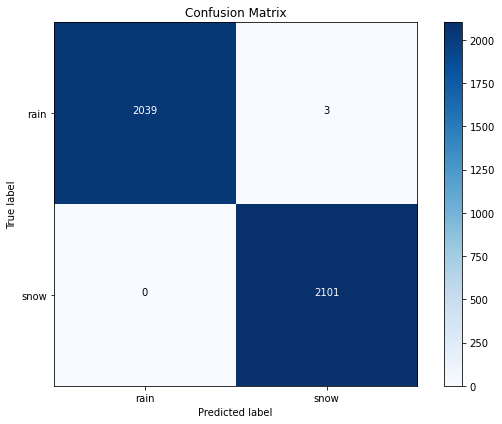

In [19]:

import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['rain', 'snow']))
plt.xticks(tick_marks, ['rain', 'snow'])
plt.yticks(tick_marks, ['rain', 'snow'])

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()